In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1=pd.read_csv('Walmart (1).csv')

In [5]:
data1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
data1.shape

(6435, 8)

In [97]:
1643690.90*6435

10577150941.5

In [51]:
data1.set_index('Date',inplace=True)
data1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667


In [52]:
a=int(input('Enter the store id:'))
store=data1[data1.Store==a]
sales=pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())

Enter the store id:4


In [53]:
sales.dtypes

Weekly_Sales    float64
dtype: object

In [54]:
sales.head(10)

,Weekly_Sales
Date,
01-04-2011,1900246.47
01-06-2012,2179360.94
01-07-2011,2051533.53
01-10-2010,1842821.02
02-03-2012,2206319.90
02-04-2010,1979247.12
02-07-2010,1881337.21
02-09-2011,2078420.31
02-12-2011,2180999.26


In [55]:
sales.reset_index(inplace=True)
sales['Date']=pd.to_datetime(sales['Date'])
sales.set_index('Date',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_416\2001450370.py:2: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date']=pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_416\2001450370.py:2: UserWarning: Parsing '13-04-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date']=pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_416\2001450370.py:2: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date']=pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_416\2001450370.py:2: UserWarning: Parsing '13-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales['Date']=pd.to_datetime(sales['Date'])
C:\Users\HP\AppData\Local\Temp\ipyke

<AxesSubplot:title={'center':'Weekly Sales of store'}, xlabel='Date'>

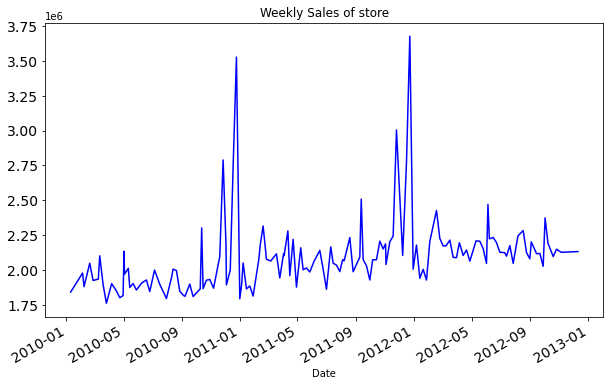

In [56]:
sales.Weekly_Sales.plot(figsize=(10,6),title='Weekly Sales of store',fontsize=14,color='blue')

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [64]:
sales.reset_index(inplace=True)
sales['Date']=pd.to_datetime(sales['Date'])

<Figure size 432x288 with 0 Axes>

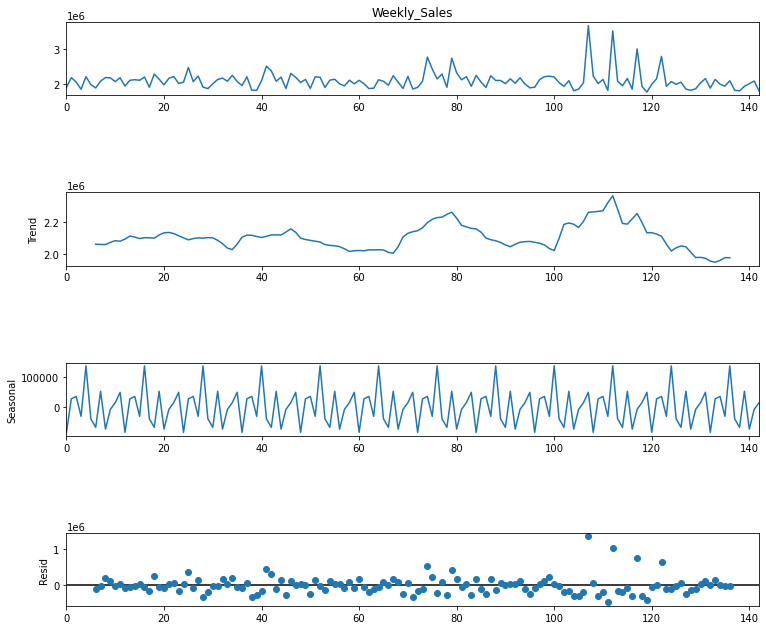

In [29]:
decompostion=seasonal_decompose(sales.Weekly_Sales,period=12)
fig=plt.figure()
fig=decompostion.plot()
fig.set_size_inches(12,10)
plt.show()

In [59]:
store24=data1[data1.Store==24]
sales24=pd.DataFrame(store24.Weekly_Sales.groupby(store24.index).sum())
sales24.reset_index(inplace=True)
sales24['Date']=pd.to_datetime(sales24['Date'])
sales24.set_index('Date',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_416\4044127567.py:4: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales24['Date']=pd.to_datetime(sales24['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_416\4044127567.py:4: UserWarning: Parsing '13-04-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales24['Date']=pd.to_datetime(sales24['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_416\4044127567.py:4: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales24['Date']=pd.to_datetime(sales24['Date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_416\4044127567.py:4: UserWarning: Parsing '13-07-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sales24['Date']=pd.to_datetime(sales24['Date'])
C:\Users\HP\AppData\

In [60]:
sales24.dtypes

Weekly_Sales    float64
dtype: object

In [61]:
sales24.head(10)

,Weekly_Sales
Date,
2011-01-04,1163803.30
2012-01-06,1467722.19
2011-01-07,1445596.61
2010-01-10,1215273.20
2012-02-03,1213994.39
2010-02-04,1478321.26
2010-02-07,1563387.94
2011-02-09,1196105.44
2011-02-12,1335647.10


In [62]:
y1=sales.Weekly_Sales
y2=sales24.Weekly_Sales

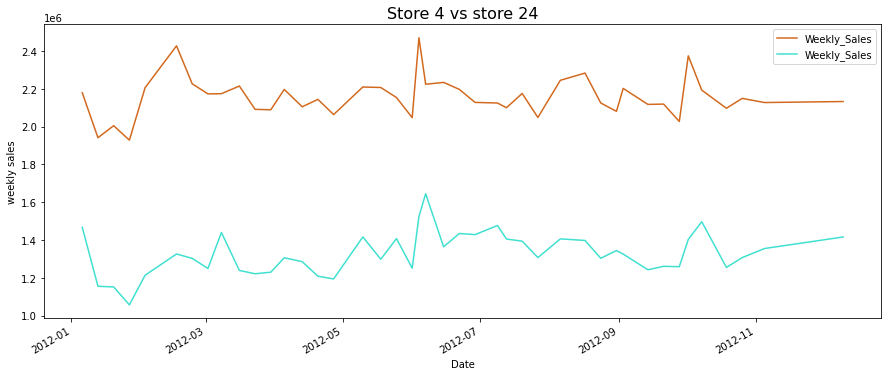

In [67]:
y1['2012'].plot(figsize=(15,6),legend=True,color='chocolate')
y2['2012'].plot(figsize=(15,6),legend=True,color='Turquoise')
plt.ylabel('weekly sales')
plt.title('Store 4 vs store 24',fontsize=16)
plt.show()

In [78]:
p=d=q=range(0,5)
import itertools
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],52)for x in list(itertools.product(p,d,q))]

In [79]:
seasonal_pdq

[(0, 0, 52),
 (0, 0, 52),
 (0, 0, 52),
 (0, 0, 52),
 (0, 0, 52),
 (0, 1, 52),
 (0, 1, 52),
 (0, 1, 52),
 (0, 1, 52),
 (0, 1, 52),
 (0, 2, 52),
 (0, 2, 52),
 (0, 2, 52),
 (0, 2, 52),
 (0, 2, 52),
 (0, 3, 52),
 (0, 3, 52),
 (0, 3, 52),
 (0, 3, 52),
 (0, 3, 52),
 (0, 4, 52),
 (0, 4, 52),
 (0, 4, 52),
 (0, 4, 52),
 (0, 4, 52),
 (1, 0, 52),
 (1, 0, 52),
 (1, 0, 52),
 (1, 0, 52),
 (1, 0, 52),
 (1, 1, 52),
 (1, 1, 52),
 (1, 1, 52),
 (1, 1, 52),
 (1, 1, 52),
 (1, 2, 52),
 (1, 2, 52),
 (1, 2, 52),
 (1, 2, 52),
 (1, 2, 52),
 (1, 3, 52),
 (1, 3, 52),
 (1, 3, 52),
 (1, 3, 52),
 (1, 3, 52),
 (1, 4, 52),
 (1, 4, 52),
 (1, 4, 52),
 (1, 4, 52),
 (1, 4, 52),
 (2, 0, 52),
 (2, 0, 52),
 (2, 0, 52),
 (2, 0, 52),
 (2, 0, 52),
 (2, 1, 52),
 (2, 1, 52),
 (2, 1, 52),
 (2, 1, 52),
 (2, 1, 52),
 (2, 2, 52),
 (2, 2, 52),
 (2, 2, 52),
 (2, 2, 52),
 (2, 2, 52),
 (2, 3, 52),
 (2, 3, 52),
 (2, 3, 52),
 (2, 3, 52),
 (2, 3, 52),
 (2, 4, 52),
 (2, 4, 52),
 (2, 4, 52),
 (2, 4, 52),
 (2, 4, 52),
 (3, 0, 52),
 (3, 0, 52),

In [83]:
import statsmodels.api as sm

In [85]:
mod= sm.tsa.statespace.SARIMAX(y1,order=(4,4,3),sesonal_order=(4,4,3,53),enforce_invertibility=False)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [86]:
results=mod.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(4, 4, 3)   Log Likelihood               -1989.908
Date:                Sun, 20 Nov 2022   AIC                           3995.817
Time:                        22:51:05   BIC                           4019.293
Sample:                             0   HQIC                          4005.357
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7288      0.160     -4.548      0.000      -1.043      -0.415
ar.L2         -0.6305      0.259     -2.433      0.015      -1.138      -0.123
ar.L3         -0.5875      0.166     -3.537      0.000      -0.913      -0.262
ar.L4         -0.5227      0.145     -3.612      0.000      -0.806      -0.239
ma.L1         -2.6374      0.202    -13.051      0.000      -3.033      -2.241
ma.L2          2.3249      0.408      5.698      0.000       1.525       3.125
ma.L3         -0.6843      0.215     -3.184      0.001      -1.105      -0.263
sigma2      2.669e+11    2.7e-12    9.9e+22      0.000    2.67e+11    2.67e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               287.46
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             1.47
Prob(H) (two-sided):                  0.33   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.5e+38. Standard errors may be unstable.
"""

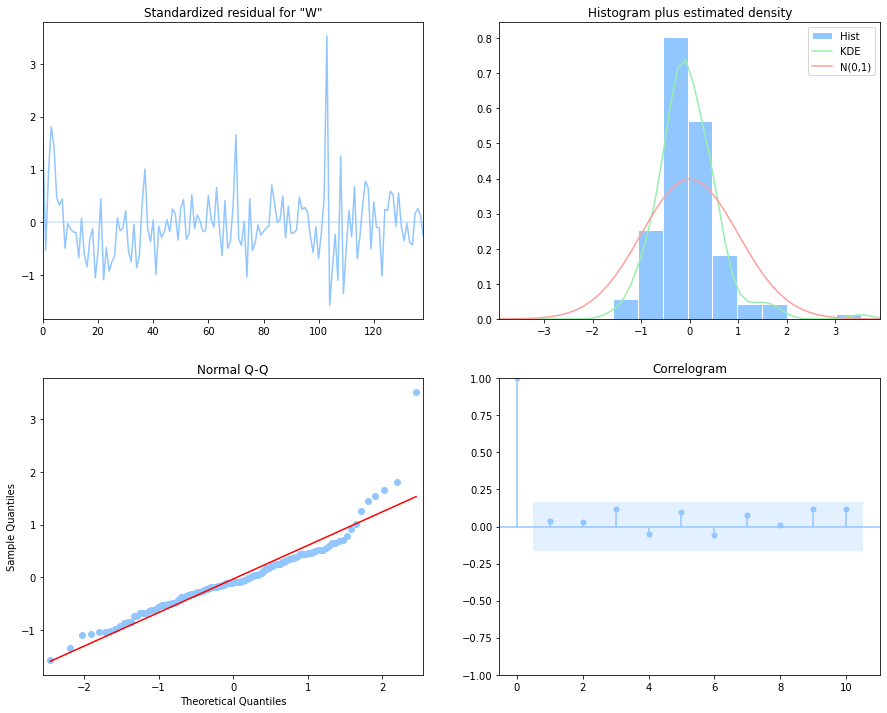

In [89]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [90]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\HP\AppData\Local\Temp\ipykernel_416\2938666703.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


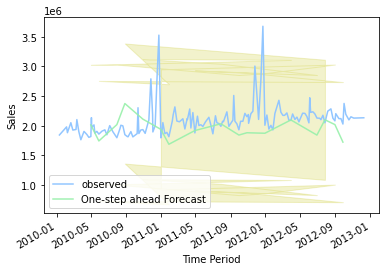

In [94]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='y', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [95]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 33285839391.45


C:\Users\HP\AppData\Local\Temp\ipykernel_416\2455634210.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


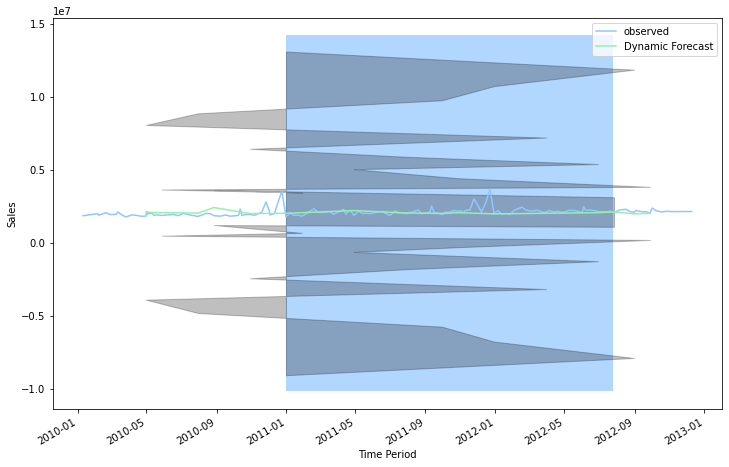

In [96]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.7, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [98]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    2.099404e+06
2010-08-27    2.405450e+06
2011-01-28    2.053892e+06
2010-05-28    2.058262e+06
2012-09-28    2.004069e+06
2011-10-28    2.052981e+06
2011-04-29    2.197945e+06
2012-06-29    2.056140e+06
2011-07-29    2.032905e+06
2010-10-29    1.994022e+06
2012-03-30    2.010584e+06
2010-04-30    2.077553e+06
2010-07-30    2.020977e+06
2011-09-30    1.999411e+06
2011-12-30    1.972975e+06
2012-08-31    1.975822e+06
2010-12-31    2.006182e+06
Name: predicted_mean, dtype: float64


In [99]:
y_truth = y1['2012-7-27':]
print(y_truth)

Date
2012-08-06    2245257.18
2012-09-03    2202450.81
2012-10-02    2374660.64
2012-10-08    2193367.69
2012-11-05    2127661.17
2012-12-10    2133026.07
2012-09-14    2117854.60
2012-08-17    2283540.30
2012-10-19    2097266.85
2012-09-21    2119438.53
2012-08-24    2125241.68
2012-10-26    2149594.46
2012-07-27    2048613.65
2012-09-28    2027620.23
2012-08-31    2081181.35
Name: Weekly_Sales, dtype: float64


In [101]:
pred_uc = results.get_forecast(steps=12)
print(pred_uc)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


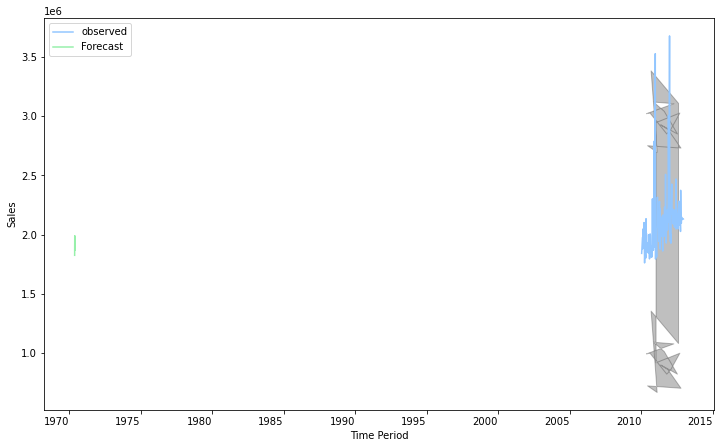

In [102]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()